In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif


%matplotlib inline
%config InlineBackend.figure_format='retina'

Let's import our dataset and have a quick look at it

In [2]:
df_main = pd.read_csv("dataset_2.csv")

In [3]:
df_main.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,1,6.1,4,4.4,4.2,0,5.5,Class_1
1,2,5.9,1,4.4,4.2,3,5.0,Class_1
2,3,5.7,4,4.3,4.2,2,5.2,Class_1
3,4,5.6,2,4.5,4.2,0,5.1,Class_1
4,5,6.0,5,4.4,4.2,1,5.6,Class_1


We first create a copy of our dataset, our analysis will be that copy only

In [4]:
df = df_main.copy()
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,1,6.1,4,4.4,4.2,0,5.5,Class_1
1,2,5.9,1,4.4,4.2,3,5.0,Class_1
2,3,5.7,4,4.3,4.2,2,5.2,Class_1
3,4,5.6,2,4.5,4.2,0,5.1,Class_1
4,5,6.0,5,4.4,4.2,1,5.6,Class_1


Now let's use some tools to explore our data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         150 non-null    int64  
 1   Feature_1  150 non-null    float64
 2   Feature_2  150 non-null    int64  
 3   Feature_3  150 non-null    float64
 4   Feature_4  150 non-null    float64
 5   Feature_5  150 non-null    int64  
 6   Feature_6  150 non-null    float64
 7   Target     150 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


In [6]:
df.shape

(150, 8)

From above we can conclude that their are no null values, so that saves some time

The first feature ie ID, is not required for further analysis, so let's just eliminate that.

In [7]:
df.drop(['Id'], axis=1, inplace = True)
df.head(2)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,6.1,4,4.4,4.2,0,5.5,Class_1
1,5.9,1,4.4,4.2,3,5.0,Class_1


Now we our describe data to better understand distribution

In [8]:
df.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,6.843333,2.453333,6.758667,5.198667,2.426667,5.054000
std,0.828066,1.759296,1.764420,0.763161,1.676312,0.433594
min,5.300000,0.000000,4.000000,4.100000,0.000000,4.000000
25%,6.100000,1.000000,4.600000,4.300000,1.000000,4.800000
50%,6.800000,2.000000,7.350000,5.300000,2.000000,5.000000
75%,7.400000,4.000000,8.100000,5.800000,4.000000,5.300000
max,8.900000,5.000000,9.900000,6.500000,5.000000,6.400000


In [9]:
## let's describe the "target" too
df.describe(include='object')

,Target
count,150
unique,3
top,Class_1
freq,50


In [11]:
df['Target'].value_counts()

Class_1    50
Class_2    50
Class_3    50
Name: Target, dtype: int64

1. "Target" variable is balanced (nothing much to do here)
2. "Feature" variables have fluctuating means, plot might give more insight

We will start by seperating "features" and "target" for easy of analysis and then let's plot features

In [12]:
df_features = df.drop(['Target'], axis=1).copy()
df_target = df.filter(['Target'], axis=1)

In [13]:
df_features.shape, df_target.shape

((150, 6), (150, 1))

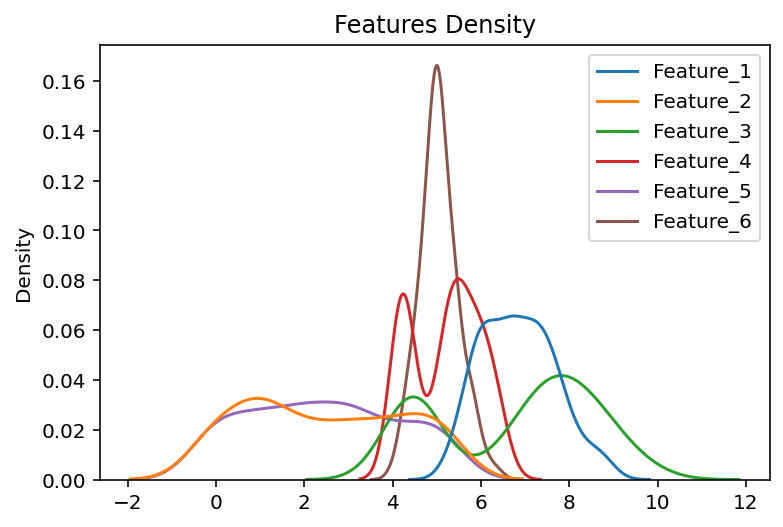

In [14]:
sns.kdeplot(data=df_features)
plt.title('Features Density')
plt.show()

Most features are varying a lot, let's normalize all to keep on same scale

In [15]:
## normalizing the data
min_max_scaler = MinMaxScaler()
df_features = pd.DataFrame(min_max_scaler.fit_transform(df_features), columns = df_features.columns)

In [16]:
df_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,0.222222,0.8,0.067797,0.041667,0.0,0.625000
1,0.166667,0.2,0.067797,0.041667,0.6,0.416667
2,0.111111,0.8,0.050847,0.041667,0.4,0.500000
3,0.083333,0.4,0.084746,0.041667,0.0,0.458333
4,0.194444,1.0,0.067797,0.041667,0.2,0.666667


In [17]:
df_features.describe() # we see now the data is between range 0 - 1

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.490667,0.467571,0.457778,0.485333,0.439167
std,0.230018,0.351859,0.299054,0.317984,0.335262,0.180664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.200000,0.101695,0.083333,0.200000,0.333333
50%,0.416667,0.400000,0.567797,0.500000,0.400000,0.416667
75%,0.583333,0.800000,0.694915,0.708333,0.800000,0.541667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


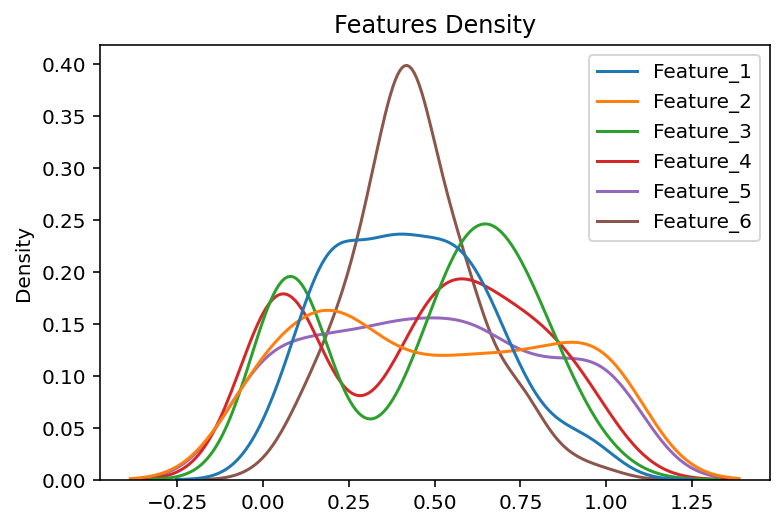

In [18]:
sns.kdeplot(data=df_features)
plt.title('Features Density')
plt.show()

In [19]:
df = pd.concat([df_features, df_target], axis = 1)
df.head(2)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,0.222222,0.8,0.067797,0.041667,0.0,0.625000,Class_1
1,0.166667,0.2,0.067797,0.041667,0.6,0.416667,Class_1


Now let's visualize the entire data with different target categories

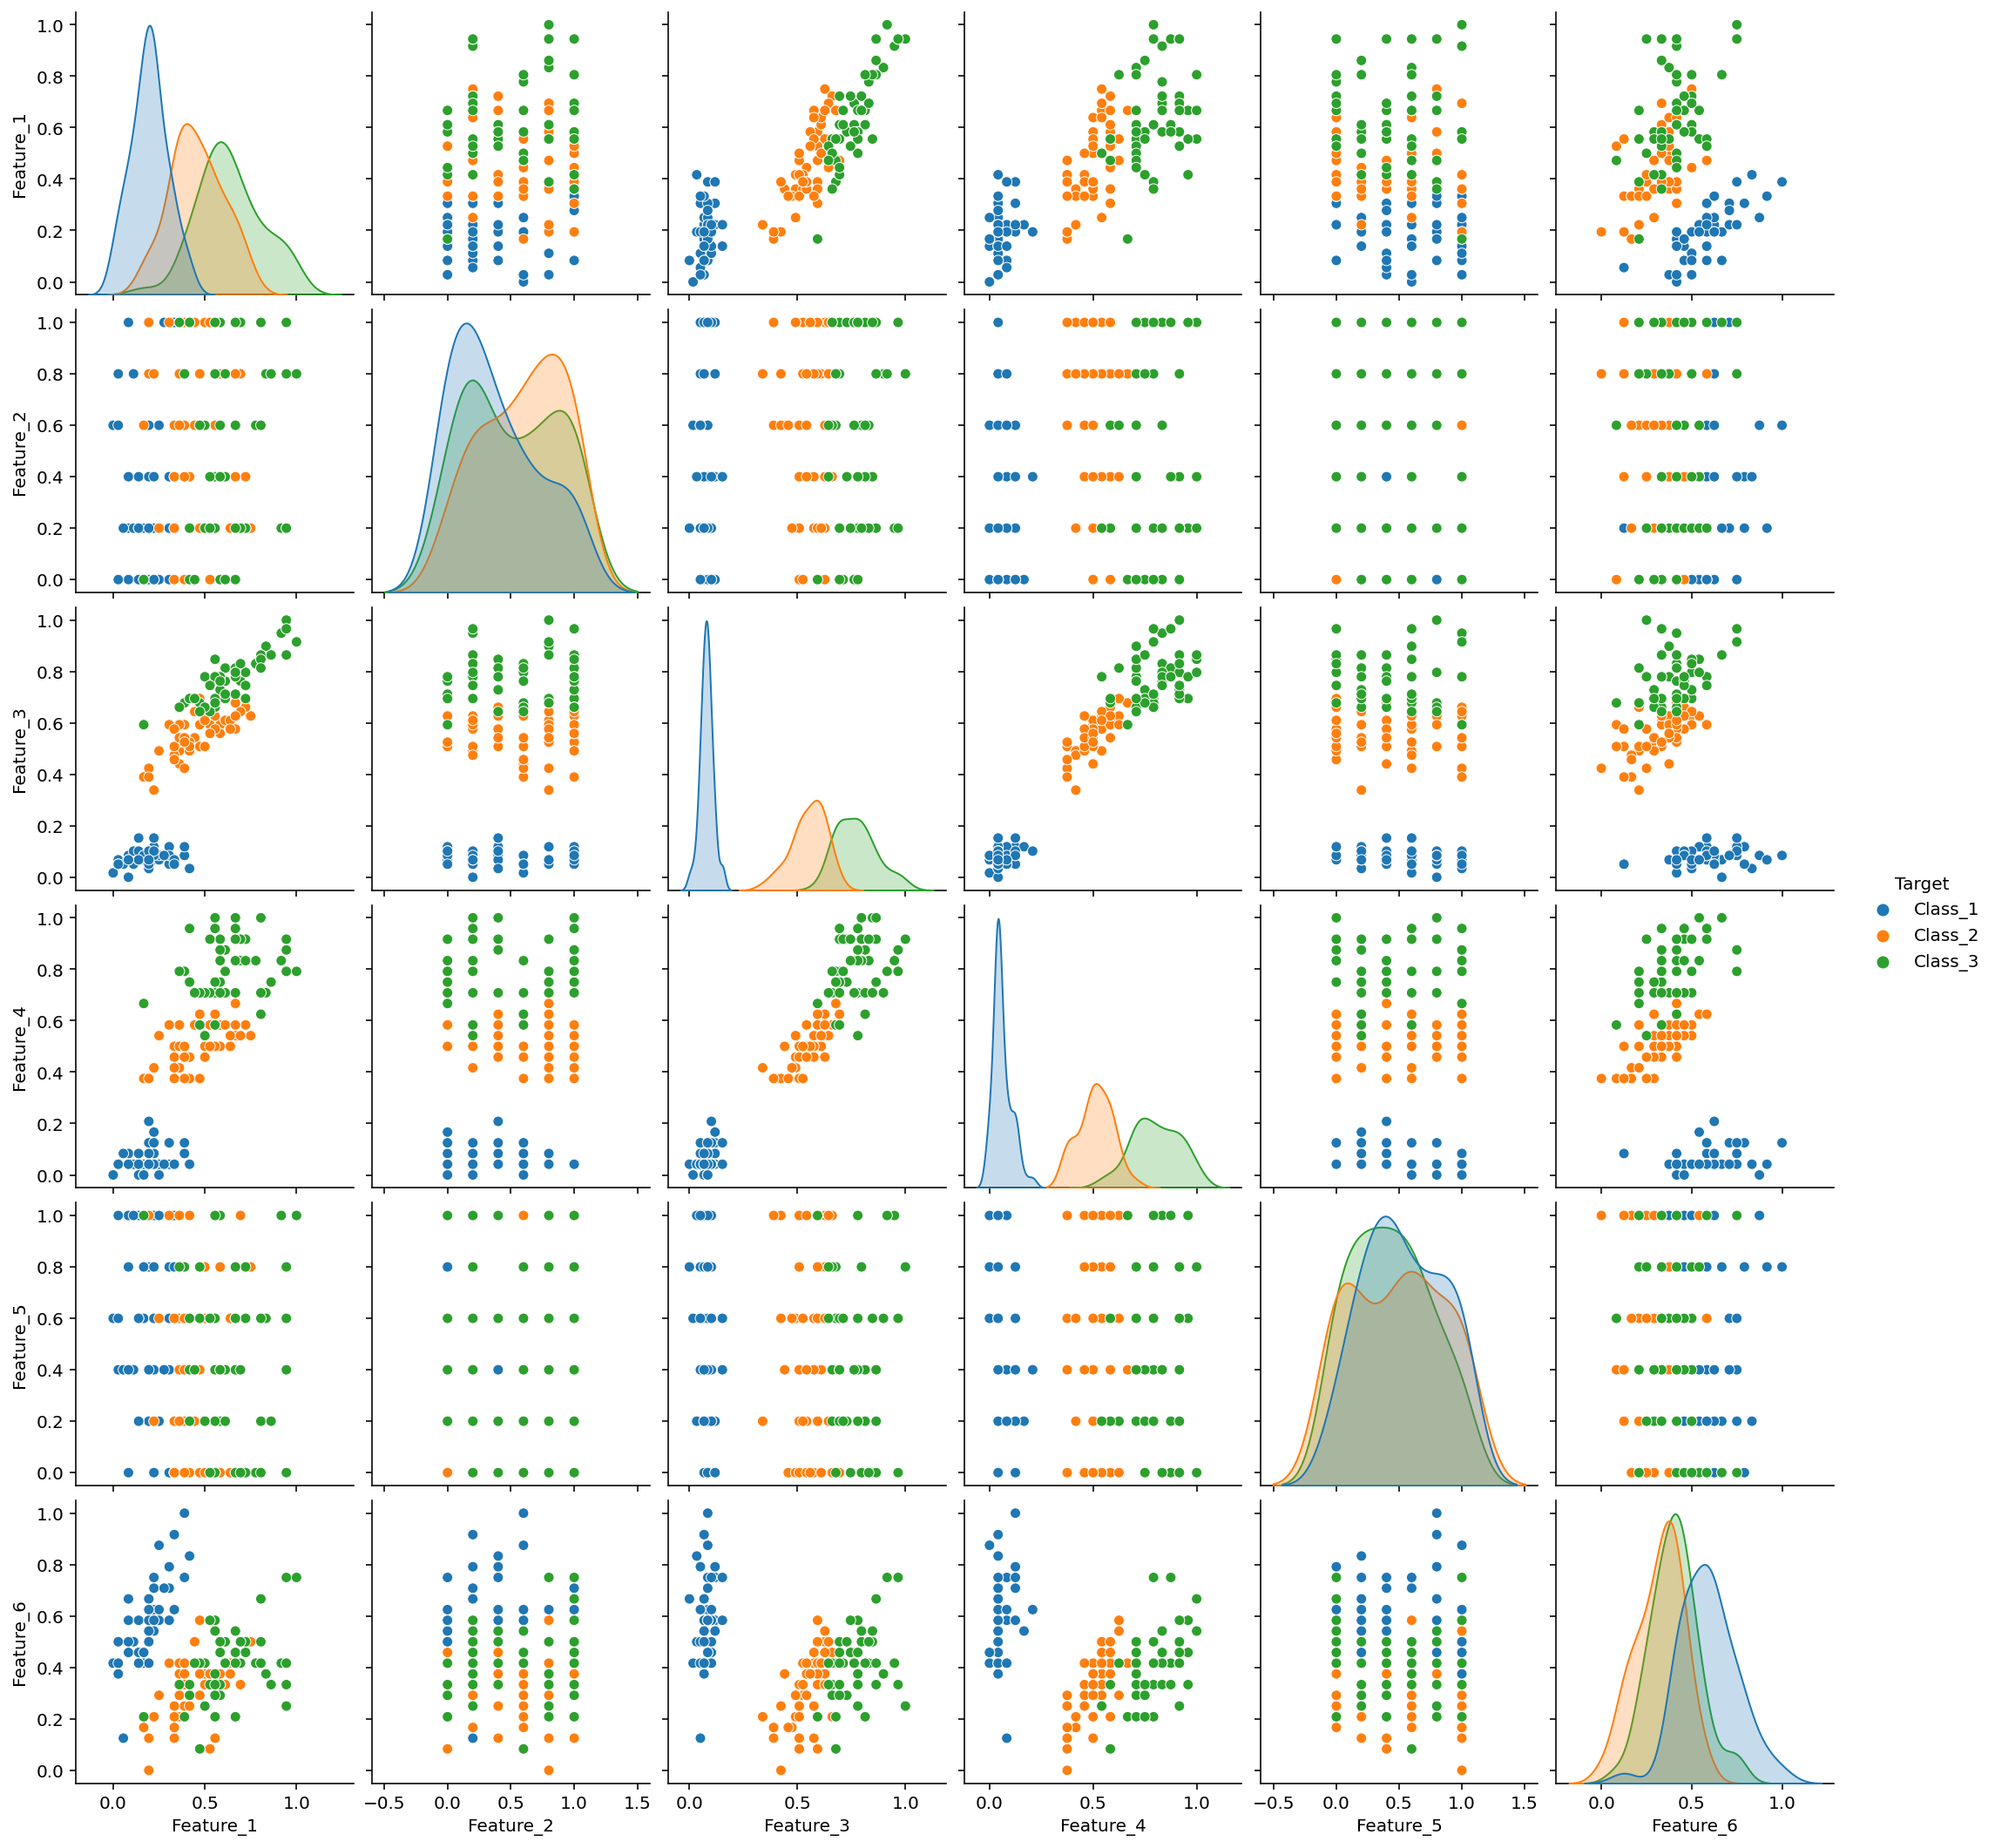

In [21]:
sns.pairplot(df, hue='Target', vars=df_features.columns)
plt.show()

Though little overwhelming let's just evaluate distributions
1. We can observe feature_2 and feature_5 distributions is overlapping almost completely, so we can just visually eliminate them, as it won't be a great feature to classify and we'll most likely lead to overfitting
2. We can observe that feature_3 and feature_4 are seperating Class1 well and are almost seperating Class2 and Class3, so this we consider
3. Further feature_1 and feature_6 seem to be a doing something(mildly) seperating the classes, we'll test it out.

So our hypothesis for now is that feature 1,3,4 and 6 might be the best features resulting in higher accuracy for classification

We use a metric Mutual Information, higher the score better the feature is related to classification task

In [26]:
# let's split data to make sure we do our hypothesis testing only on training samples
X_train, _, Y_train, _ = train_test_split(df_features, df['Target'], test_size = 0.2, random_state = 21)

In [27]:
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Feature_3    1.030070
Feature_4    0.975170
Feature_1    0.509037
Feature_6    0.277000
Feature_5    0.091912
Feature_2    0.000382
dtype: float64

1. We can observe that feature_2 and feature_5 scores are close to 0 (clearly supports their elimination).
2. We can also observe that feature_3 and feature_4 are best of features for this problem
3. feature_1 is in between the range we have, feature_6 has low score though it is better then feature 5 and 2.

We can now move forward with 4 features, although 3 seems to enough.

In [28]:
## function to apply support vector machine
def apply_svc(features, target, report):
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 21)
    model = svm.SVC()
    model.fit(X_train, Y_train.values.ravel())

    if report:
        generate_reports(model,X_train, X_test, Y_train, Y_test)
    
    return model

## function to apply support vector machine
def apply_randomforest(features, target, report):
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 21)
    model = RandomForestClassifier()
    model.fit(X_train, Y_train.values.ravel())
    
    if report:
        generate_reports(model,X_train, X_test, Y_train, Y_test)
    
    return model

## function to generate report
def generate_reports(model,X_train, X_test, Y_train, Y_test):
    P_train = model.predict(X_train)
    P_test = model.predict(X_test)
    print(".................Report for Training set....................")
    print("Confusion Matrix")
    print(confusion_matrix(Y_train, P_train),"\n")
    print(Y_train.shape)
    print("Accuracy: ", accuracy_score(Y_train, P_train))
    
    
    print("Classification Report")
    print(classification_report(Y_train, P_train),"\n")
    
    
    print(".................Report for Testing set....................")
    print("Confusion Matrix")
    print(confusion_matrix(Y_test, P_test), "\n")
    print("Accuracy: ", accuracy_score(Y_test, P_test))

    
    print("Classification Report")
    print(classification_report(Y_test, P_test),"\n")

In [29]:
## Before fitting the models, let's make sure to drop feature 5 and 2
df_features.drop(['Feature_5', 'Feature_2'], axis = 1, inplace= True)
df_features.head(1)

,Feature_1,Feature_3,Feature_4,Feature_6
0,0.222222,0.067797,0.041667,0.625


In [34]:
model_1_v1 = apply_svc(df_features, df_target, True)

.................Report for Training set....................
Confusion Matrix
[[39  0  0]
 [ 0 38  0]
 [ 0  1 42]] 

(120, 1)
Accuracy:  0.9916666666666667
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       0.97      1.00      0.99        38
     Class_3       1.00      0.98      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120
 

.................Report for Testing set....................
Confusion Matrix
[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Accuracy:  0.9333333333333333
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.83      0.91        12
     Class_3       0.78      1.00      0.88         7

    accuracy                           0.93        30

In [36]:
model_2_v1 = apply_randomforest(df_features, df_target, True)

.................Report for Training set....................
Confusion Matrix
[[39  0  0]
 [ 0 38  0]
 [ 0  0 43]] 

(120, 1)
Accuracy:  1.0
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       1.00      1.00      1.00        38
     Class_3       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120
 

.................Report for Testing set....................
Confusion Matrix
[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Accuracy:  0.9333333333333333
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.83      0.91        12
     Class_3       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg  

The results above do perform decent on the problem, but perhaps we can tune it little bit more by removing feature_6

In [37]:
model_1_v2 = apply_svc(df_features.drop(['Feature_6'], axis=1), df_target, True)

.................Report for Training set....................
Confusion Matrix
[[39  0  0]
 [ 0 37  1]
 [ 0  2 41]] 

(120, 1)
Accuracy:  0.975
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       0.95      0.97      0.96        38
     Class_3       0.98      0.95      0.96        43

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.98       120
weighted avg       0.98      0.97      0.98       120
 

.................Report for Testing set....................
Confusion Matrix
[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]] 

Accuracy:  0.9333333333333333
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.83      0.91        12
     Class_3       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg

In [38]:
model_2_v2 = apply_randomforest(df_features.drop(['Feature_6'], axis=1), df_target, True)

.................Report for Training set....................
Confusion Matrix
[[39  0  0]
 [ 0 38  0]
 [ 0  0 43]] 

(120, 1)
Accuracy:  1.0
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       1.00      1.00      1.00        38
     Class_3       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120
 

.................Report for Testing set....................
Confusion Matrix
[[11  0  0]
 [ 0 10  2]
 [ 0  1  6]] 

Accuracy:  0.9
Classification Report
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       0.91      0.83      0.87        12
     Class_3       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      

**Let's summarize all the results**

1. We 2 version's of our model, for both SVM and Random Forest.

2. Version 1 takes 4 features(1,3,4,6) into consideration.

3. Version 2 takes 3 features(1,3,4) into consideration.

4. Our first versions do perform well on test set,
    but the models error difference is 6% for SVM and 7% for Random Forest.
    
5. Whereas if we consider second version, it has error difference of 
    4% for SVM and 10% for Random Forest.
    
6. If we had to choose the least overfitting model with high accuracy would be ideal choice,
    so SVM is the way to go with our 3 features(1,3,4), accuracy 97% and 93 % on training and testing respectively.
    
7. If we observe just our 2nd SVM model, it shows that Class_2 and Class_3 are the ones we have more trouble to recall and precisely classify.
8. We can remove another feature ie feature_1, but that would cost us accuracy


